# Tensorflow fundamentals

*   A tensor can be seen as a numerical representaion of a data (image, text..) 
*   It is an n-dimensional array
*   Difference in tf.variable and tf.constant. tf.variable value can be changed using assign method while constant tesor value can't be changed.
*   Random tensors: Tensors of arbitrar size which contain random numbers (initializing random weights)
*  
*   
*   











In [ ]:
# Import modules
import numpy as np
import pandas as pd

# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
#  Create tensors with tf.constant()
scalar = tf.constant(7)
vector = tf.constant([10,10])
scalar  

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# ndim 
print(scalar.ndim)
print(vector.ndim)

0
1


In [ ]:
# Variables in Tensor
var = tf.Variable([10,10])
print(var)
var[0].assign(7)
print(var)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10, 10], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([ 7, 10], dtype=int32)>


In [ ]:
# Creating Random Tensors
random = tf.random.Generator.from_seed(42)  # set seed for reproducibility
random = random.normal(shape = (3,2))
random

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:
# Shuffle: Required to avoid the inherent order to effect the learning. 
# if 100 same classes are first 100 rows of dataset then model wil think that it only has to preict one class
not_shuffled = tf.constant([[1,2],
                           [3,4],
                           [5,6]])
print(not_shuffled)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [ ]:
# Defining seed will create same shuffled results every time or reproduce it
# There are two level of seeds: global level and operational level
shuffled = tf.random.shuffle(not_shuffled, seed = 42)

# This will shffle only first dimension (which is rows in matrix )
shuffled 

# Still order is changing as it is an operaional level seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[5, 6],
       [3, 4],
       [1, 2]], dtype=int32)>

In [ ]:
# Try Setting seed at global level
tf.random.set_seed(42) # global level seed 
shuffled = tf.random.shuffle(not_shuffled, seed = 42) # operaional level seed
shuffled 

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
# tensor of zeros
tf.zeros([3,4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# tensor of ones
tf.ones([3,5])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

## TURN NUMPY ARRAY INTO tensors

WHY : Main diff between numpy arrays and tesnors is that tensors can be run in GPUs (Much faster for numerical computation)

In [ ]:
numpy_A = np.arange(1,25)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
# this a can run on GPU
a = tf.constant(numpy_A, shape = None)
a

<tf.Tensor: shape=(24,), dtype=int64, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [ ]:
A = tf.constant(numpy_A, shape = (6,4)) # make sure 6*4 = 24
print(A.ndim)
A

2


<tf.Tensor: shape=(6, 4), dtype=int64, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]])>

## Gettnig Information tensors
1. shape
2. Rank
3. Axis
4. Size

In [ ]:
 # Creat a tensor of rank 
 tR4 = tf.zeros(shape=(3,2,4,5))
 tR4

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
tR4[0] # this will give first dimension first element

<tf.Tensor: shape=(2, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
tR4[0][0]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tR4.shape, tR4.ndim, tf.size(tR4)

(TensorShape([3, 2, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
tR4.dtype

tf.float32

## Indexing tensors
They can be indexed like python lists

In [ ]:
# Get the first 2 elements of each dimension
tR4[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get first element from each dimension except last
tR4[0:3, :1, :1, :]

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
tR2 = tf.constant([[10, 7],
                   [3, 4]])
tR2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Comma separates dim when we are getting elements, use -1 for last element
tR2[-1,-1]

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
# Add extra dimension
# 1st way
tR2_addAxis = tR2[tf.newaxis, :, :]
print(tR2_addAxis)

tf.Tensor(
[[[10  7]
  [ 3  4]]], shape=(1, 2, 2), dtype=int32)


In [ ]:
# 2nd way
tf.expand_dims(tR2, axis = -1)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
tf.expand_dims(tR2, axis = 0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

## Manipulating Tensors

In [ ]:
# Addition 
tensor = tf.constant([[10, 7],
                     [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
tf.math.add(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
tf.math.multiply(tensor, 3)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[30, 21],
       [ 9, 12]], dtype=int32)>

## Matrix multiplication

In [ ]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# linalg means linear algebra
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor*tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [ ]:
# Use @ 
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
t1 = tensor
t2 = tf.math.multiply(tensor, 4)
t2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[40, 28],
       [12, 16]], dtype=int32)>

In [ ]:
# other shape
t2 = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
t2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
tensor @ t2
# InvalidArgumentError: Matrix size-incompatible: In[0]: [2,2], In[1]: [3,2] [Op:MatMul]

InvalidArgumentError: ignored

There are 2 rules for matrix multiplication
1. Inner dimensions must match
2. The resulting matrix has the shape of the outer dimensions 

In [ ]:
if t2.shape[0] != tensor.shape[-1]:
  print('Matrix mul is not possible')

Matrix mul is not possible


In [ ]:
# diff in tf.transpose-- will flip rows from cols 
# and tf.reshape-- will shuffle tensor elements
t3 = tf.constant([[1, 2, 3],
                 [4, 5, 6]])
tf.transpose(t3)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)>

In [ ]:
tf.reshape(t3, shape = (3,2))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

Generally when performing multiplication of the axes doesn't line up, we will transpose rather than reshape
inorder to satisfy matrix multiplication rule 

In [ ]:
tf.transpose(t3)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)>

**MIXED PRECISON: A WAY TO MAKE TRAINING FASTER**

Mixed precision makes the use of both 16-bit and 32-bit floating point dtypes during model training to make it run faster and use less memory

There is KPI for doing this which improves perfoemanve by more than 3 times on GPUs

**ADVANTAGE OF USING 16-bit precision**

16 bit number will only consume 16 bits of memory. Thus memory efficient

16 bit dtypes can be read faster from memory

In [ ]:
B = tf.constant([1.7, 2.4])
B.dtype
# By default we have float32

tf.float32

In [ ]:
D = tf.cast(B, dtype= tf.float16)
D.dtype

tf.float16

In [ ]:
# int32 to float32
C = tf.constant([4])
C.dtype

tf.int32

In [ ]:
A = tf.cast(C, dtype = tf.float32)
A.dtype

tf.float32

## Aggregating Tensors

It is condensing them from multiple values down to a smaller amount of values

In [ ]:
D = tf.constant([-7, -10])
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Aggrgation:
* Get minimum
* Get maximum
* Get the mean of a tensor
* Get the sum of a tensor





In [ ]:
# Create tensor
E = tf.constant(np.random.randint(0, 100, size = 50))
E


<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([94, 22,  5, 26,  5, 87, 69, 86, 38, 20, 44, 28, 33,  8, 15, 25, 27,
       79, 65, 67, 15, 47, 25, 51, 68, 16, 91, 81, 18, 47,  9, 11, 32, 31,
        8, 70, 61, 88, 61, 27, 88, 38,  9, 30, 35, 98,  9, 16, 54, 37])>

In [ ]:
# min
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [ ]:
# mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
# sum
tf.reduce_sum(E)

In [ ]:
# Variance
E = tf.cast(E, dtype = tf.float32)
tf.math.reduce_variance(E)

In [ ]:
n = np.array([90, 15, 29, 25, 98, 89, 29, 39, 12, 98, 70, 63, 49, 49, 78, 52, 78,
       60, 94, 96, 74, 96, 43, 62, 23, 25, 88, 69, 13, 80, 39, 93,  5, 54,
       50, 87, 80, 50, 29, 92, 63, 60, 80, 31,  8, 51, 30, 96, 77, 15]).astype('float32')
np.var(n)

In [ ]:
import tensorflow_probability as tfp
tfp.stats.variance(E)

## Positional max and min

In [ ]:
tf.random.set_seed(42)
F = tf.random.uniform(shape = [50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
F[tf.argmin(F)]

## Squeezing a tensor

Dimensions will be reduced

In [ ]:
G = tf.constant(tf.random.uniform(shape=[50]), shape = (1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.2646016 , 0.36714447, 0.75009894, 0.31817746, 0.12732434,
           0.7825868 , 0.7073276 , 0.08290946, 0.16747987, 0.8381481 ,
           0.11807156, 0.3798926 , 0.4580754 , 0.27557182, 0.02938974,
           0.30506206, 0.41933215, 0.6696589 , 0.15117204, 0.7487788 ,
           0.09517586, 0.02551353, 0.7021611 , 0.42027128, 0.00208449,
           0.3625281 , 0.04587531, 0.4779967 , 0.20187497, 0.84753394,
           0.5804684 , 0.7913648 , 0.973806  , 0.04894388, 0.49849594,
           0.9636178 , 0.97011995, 0.6003567 , 0.78204226, 0.74798465,
           0.46055675, 0.4026991 , 0.38100076, 0.26601648, 0.03651869,
           0.6634238 , 0.93597233, 0.68750966, 0.5938206 , 0.90628064]]]]],
      dtype=float32)>

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed.shape

TensorShape([50])

## One Hot Encoding

It is a form of Numerical Encoding

In [ ]:
somelist = [1,2,3,4]
tf.one_hot(somelist, depth =4)

## sqaring, log, sqare root

In [ ]:
H = tf.range(1,10)
H

In [ ]:
tf.square(H)

In [ ]:
tf.sqrt(tf.cast(H, tf.float32))

In [ ]:
tf.math.log(tf.cast(H, tf.float32))

## Tensors and numpy

TensorFlow interacts beautifully with Numpy arrays

In [ ]:
J = tf.constant([3.0, 4.0])
J

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 4.], dtype=float32)>

In [ ]:
J.numpy()[1]

4.0

In [ ]:
J.dtype

tf.float32

## How to access GPU

speed of numerical computation: TPU > GPU > CPU

CUDA: created b NVIDIA. It is an interface between tensorflow and GPU

Tensorflow automaticall finds Cuda Enabled GPU

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# NN REGRESSION WITH TF

## NN architectrue

**--Creating Model**

Input layer: tf.keras.Input(shape(featres,))

Hidden layer: tf.keras.layers.Dense(no. of nodes, activation = '')

Outputlayer: tf.keras.layers.Dense(1, actvation = '')


**--Compiling model**

model.compile(loss = tf.keras.losses.anytype, optimizer = tf.keras.optimizers.Adam, lr = 0.001, metric = [""])

loss = lost fnuction used in opt algo

metric = function used to track learning with epochs

**--Fitting the model**

model.fit(X-train, y-train, epochs = 100)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.2


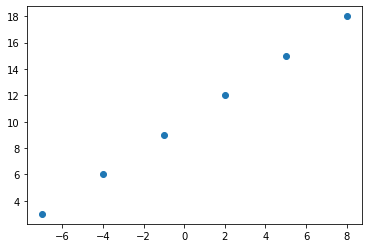

In [ ]:
# create fearure
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

plt.scatter(X, y)

tensorflow takes input of min_dim = 2. If we are passing a vector as input then we need to exapnd the dimensions


In [ ]:
# FIRST STEP IS TO CONVERT NP ARRAY INTO TENSORS
X = tf.cast(tf.constant(X), dtype = tf.float32)
X = tf.expand_dims(X, axis=-1)
y = tf.constant(y)

In [ ]:
y.ndim

1

In [ ]:
tf.random.set_seed(42)

# 1. Create model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) 
    ])

# Compile model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), metrics = ["mae"])

# model fitting
model.fit(tf.expand_dims(X, axis=-1),y, epochs=10)

# rnutime reduced after changing dtype of tensor from float64 to float32

Epoch 1/10
1/1 [==============================] - 1s 688ms/step - loss: 10.3017 - mae: 10.3017
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 10.2927 - mae: 10.2927
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 10.2838 - mae: 10.2838
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 10.2748 - mae: 10.2748
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 10.2659 - mae: 10.2659
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 10.2569 - mae: 10.2569
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 10.2480 - mae: 10.2480
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 10.2390 - mae: 10.2390
Epoch 9/10
1/1 [==============================] - 0s 25ms/step - loss: 10.2301 - mae: 10.2301
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 10.2211 - mae: 10.2211


first epoch is slow: In first epoch data is being generated and loaded in the memory

Steps of modelling in tensorflow:
1. Get the data ready (convert into tensors)
2. Build the model network
3. compile model
4. fit the model
5. Evaluate the model
6. Improve the model through experimentation
7. save and reload

In [ ]:
# the above model is off by 11 
# Improving the model



Improving model

--during model architect creation:

1. Increase no. of layers
2. Increase nodes in layers
3. Change activation function

--durnig compiling:

1. Change optimization function
2. Change learning rate

--fitting:

1. Change epochs


In [ ]:
# creating large model

# Increasing epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(lr = 0.01), 
              metrics = ['mae'])

model.fit(X,y, epochs = 500)

In [ ]:
# Changing lr (with smaller epochs we converge fast)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(lr = 0.1), 
              metrics = ['mae'])

model.fit(X,y, epochs = 100)

print(model.predict([17.0])) # No overfit

In [ ]:
# Changing optimizer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr = 0.01), 
              metrics = ['mae'])

model.fit(X,y, epochs = 100)

print(model.predict([17.0]))  # No over fit

In [ ]:
# Changing model architecture 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(lr = 0.1), 
              metrics = ['mae'])

model.fit(X,y, epochs = 100)

print(model.predict([17.0])) # It should be 27 so overfitting

Increaing no of layers may lead to overfitting

In [ ]:
# change activation function and dec nodes
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(lr = 0.1), 
              metrics = ['mae'])

model.fit(X,y, epochs = 100)

print(model.predict([17.0])) # dint overfit that much this time

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 10.3631 - mae: 10.3631
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9906 - mae: 9.9906
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6044 - mae: 9.6044
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.1906 - mae: 9.1906
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7343 - mae: 8.7343
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2188 - mae: 8.2188
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.6249 - mae: 7.6249
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3052 - mae: 7.3052
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4058 - mae: 7.4058
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.6804 - mae: 6.6804
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 5

Learning rate is the most important hyperparameter

start by changing fit paramert than compile than architecture

## Evaluating Tensorflow model

IMP: Visualize

1. data
2. model
3. model learning 
4. predictions

In [ ]:
# make dataset 
X = np.arange(-100, 100, 4)
X = tf.cast(tf.constant(X), dtype= tf.float32)
X = tf.expand_dims(X, axis = -1)
y = np.arange(-100, 100, 4) + 10
y = tf.cast(tf.constant(y), dtype = tf.float32)

the 3 sets:

Training set: 70-80%

Validation set: 10-20%

test set: 10-20%

**GENERALIZATION:**

The ability of a model to do well on data it has not seen before 

In [ ]:
# train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(),
                                      test_size=0.20, random_state=42)

In [ ]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

[]

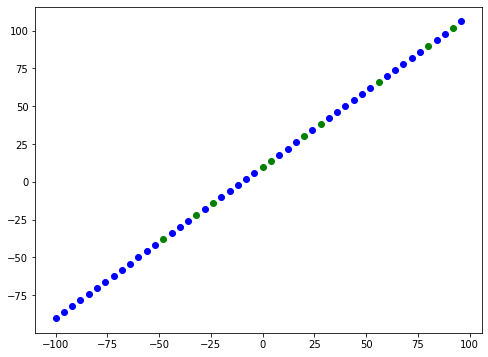

In [ ]:
plt.figure(figsize = (8, 6))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')

plt.plot()

Meaning of Dense: Fully connected layer- All nodes of this layer are connected to all nodes of next layer

## Visualizing model

1. model.summary()

2. plot_model()

In [ ]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(lr = 0.01), 
              metrics = ['mae'])

model.fit(X_train,y_train, epochs = 100)

# model.summary()

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step - loss: 45.9028 - mae: 45.9028
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8721 - mae: 12.8721
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0173 - mae: 10.0173
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 17.2803 - mae: 17.2803
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.0157 - mae: 10.0157
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.7907 - mae: 13.7907
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5140 - mae: 12.5140
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8161 - mae: 9.8161
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9908 - mae: 14.9908
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7474 - mae: 9.7474
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 11

In [ ]:
# Creating model inclding input shape 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(lr = 0.1), 
              metrics = ['mae'])

model.fit(X,y, epochs = 500)

model.summary()

Epoch 1/500
2/2 [==============================] - 1s 5ms/step - loss: 56.5356 - mae: 56.5356
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 51.9549 - mae: 51.9549
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 42.8369 - mae: 42.8369
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 52.0501 - mae: 52.0501
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 56.0152 - mae: 56.0152
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 52.5501 - mae: 52.5501
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 49.3952 - mae: 49.3952
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 67.8982 - mae: 67.8982
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 65.7455 - mae: 65.7455
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 47.6085 - mae: 47.6085
Epoch 11/500
2/2 [==============================] - 0s 10m

Total parameters: toatal prams in model

Total trainable params : the parameters that model can update as it trains 

Non trainable: In transfer learning we can freeze params

In [ ]:
# add layer and check total params

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(1, name = 'IL'),
    tf.keras.layers.Dense(10, activation = 'relu', name = 'HL1'),
    tf.keras.layers.Dense(1, name = 'OL')
])

model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae, 
              metrics = ['mae'])

model.fit(X_train, y_train, epochs = 100, verbose = 0)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 10)                20        
                                                                 
 OL (Dense)                  (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


No of params in a layer: [n(l-1) + 1]*[n(l)]

---



**1st layer is input layer which has nodes equal to no of features. It is not shown in summary as it is not considered as a layer as there are no paramerters in this layer. The input and output of input layer is same which is simply vector of features**

**In any node of any hidden layer 2 steps computation takes place:**

1. **z computation: wT . X + b**

2. **sigma(x) computation**

**So output from any layer is same as the no of nodes in that layer**

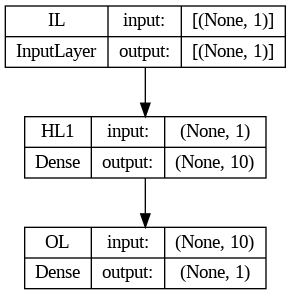

In [ ]:
# other better way to visuaize

from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

Verbose:

0- no output

1- progress bar

2- one line per epoch


**WATCH: MIT Introduction to Deep Learning**

In [ ]:
y.ndim

2

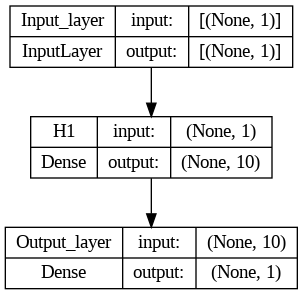

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(1, name = 'Input_layer'),
    tf.keras.layers.Dense(10, name = 'H1'),
    tf.keras.layers.Dense(1, name = 'Output_layer')
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.05),
              loss = tf.keras.losses.mae, 
              metrics = 'mae')

plot_model(model = model, show_shapes = True)

## Visualizing Model predictions

In this problem using Adam finally solved the problem SGD din't solved the issue

In [ ]:
def plot_performance(X_train = X_train, y_train = y_train,
                     X_test = X_test, y_test = y_test, y_pred = y_pred):
  X_train = X_train
  y_train = y_train
  X_test = X_test
  y_test = y_test
  y_pred = y_pred

  # plot
  plt.figure(figsize = (7,5))

  plt.scatter(X_train, y_train, c = 'b', label = 'training')

  plt.scatter(X_test, y_test, c = 'g', label = 'testing')

  plt.scatter(X_test, y_pred, c = 'r', label = 'predictions')

  plt.plot()  


In [ ]:
y_train.ndim

1

In [ ]:
X = np.arange(-100, 100, 4)
y = X + 10

# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(lr = 0.009),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=500, batch_size = 40)

Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 271ms/step - loss: 33.0174 - mae: 33.0174
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 12.0127 - mae: 12.0127
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 29.5390 - mae: 29.5390
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 29.2103 - mae: 29.2103
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 9.6306 - mae: 9.6306
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 10.6359 - mae: 10.6359
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 24.2160 - mae: 24.2160
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 30.7396 - mae: 30.7396
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 9.3448 - mae: 9.3448
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 10.5153 - mae: 10.5153
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 9

1/1 [==============================] - 0s 49ms/step


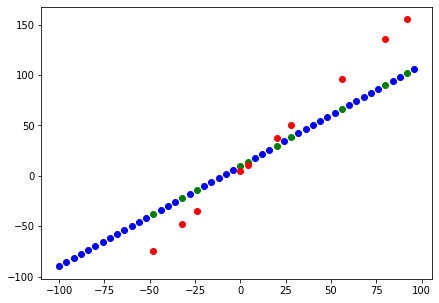

In [ ]:
# make predictions
y_pred = model_1.predict(X_test)
y_pred = y_pred.squeeze()
plot_performance(X_train = X_train, y_train = y_train,
                     X_test = X_test, y_test = y_test, y_pred = y_pred)

using ADAM

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr = 0.04),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, batch_size = 10)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 3ms/step - loss: 29.7575 - mae: 29.7575
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 18.1788 - mae: 18.1788
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 10.7221 - mae: 10.7221
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 11.7462 - mae: 11.7462
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 10.8152 - mae: 10.8152
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 9.0523 - mae: 9.0523
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 8.1029 - mae: 8.1029
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 8.5212 - mae: 8.5212
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 7.3635 - mae: 7.3635
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 7.5219 - mae: 7.5219
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 7.1690 - 

1/1 [==============================] - 0s 60ms/step


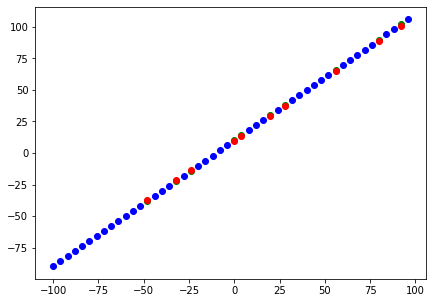

In [ ]:
# make predictions
y_pred = model_2.predict(X_test)
y_pred = y_pred.squeeze()
plot_performance(X_train = X_train, y_train = y_train,
                     X_test = X_test, y_test = y_test, y_pred = y_pred)

## Regression Evaluation Metrics:

1. MAE : good starter metric

2. MSE : should be used when large errors are more significant than small errors.

3. Huber : Combination of MSE and MAE (tf.keras.losses.Huber()). Less sensitive to outliers than MSE.

metrics is for tracking model learning

Loss function is used during learning for optimization

In [ ]:
# Evaluate [mae, loss]
model_2.evaluate(X_test, y_test)

# or tf.keras.losses.MAE(y_test, y_pred).numpy() -- squeeze y_pred

1/1 [==============================] - 0s 232ms/step - loss: 1.7831 - mae: 1.7831


[1.7831268310546875, 1.7831268310546875]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae.numpy()

1.7831268

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.243733>

## Tensorflow modelling experiments

way: simply create a pandas df comparing different models.

When lots of models are expereimented then we need tools 


1. Tensorboard : a visualiztion tool of tesorflow library to track modelling experiments

2. Weights and Biases: for tracking. plugs straight into tensorboard

## Saving models

1. Save model: model.save('path')
formats: 

a. the saved model format

b. HDF5 format (for saving large models)


In [ ]:
model_2.save('best_model_SM') # we get  folder here

In [ ]:
model_2.save('best_model_HD.h5') # we get a file here

In [ ]:
# load models
loaded_model_SM = tf.keras.models.load_model('/content/best_model_SM')
loaded_model_hdf5 = tf.keras.models.load_model('/content/best_model_HD.h5')

In [ ]:
loaded_model_hdf5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(loaded_model_hdf5.predict(X_test))

1/1 [==============================] - 0s 42ms/step
[[-37.620106 ]
 [ 65.21162  ]
 [ 29.61602  ]
 [ 88.94202  ]
 [-21.79984  ]
 [100.80721  ]
 [ 13.7957535]
 [  9.840689 ]
 [ 37.526146 ]
 [-13.889708 ]]


In [ ]:
print(loaded_model_SM.predict(X_test))

1/1 [==============================] - 0s 44ms/step
[[-37.620106 ]
 [ 65.21162  ]
 [ 29.61602  ]
 [ 88.94202  ]
 [-21.79984  ]
 [100.80721  ]
 [ 13.7957535]
 [  9.840689 ]
 [ 37.526146 ]
 [-13.889708 ]]


In [ ]:
model_2.predict(X_test) == loaded_model_SM.predict(X_test)

1/1 [==============================] - 0s 28ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# saving model into google drive
!cp /content/best_model_HD.h5 /content/drive/MyDrive

## A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# one hot encoding using dummies method
insurance = pd.get_dummies(insurance)
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
y = insurance['charges']
X = insurance.drop(['charges'], axis = 1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3
                                            , random_state = 42)

In [ ]:
# Convert data into tensors
X_train = tf.constant(X_train, dtype = tf.float32)
X_test = tf.constant(X_test, dtype = tf.float32)
y_train = tf.constant(y_train, dtype = tf.float32)
y_test = tf.constant(y_test, dtype = tf.float32)

In [ ]:
# Build model Archtecture
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name = 'HL2'),
    tf.keras.layers.Dense(1, name = 'OL')
])

# Compile model
model_1.compile(optimizer = tf.keras.optimizers.SGD(lr=0.001),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])

model_1.fit(X_train, y_train, epochs = 100, verbose = 0)

print(model_1.summary())

print(model_1.evaluate(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 10)                120       
                                                                 
 OL (Dense)                  (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None
13/13 [==============================] - 0s 2ms/step - loss: 6382.6914 - mae: 6382.6914
[6382.69140625, 6382.69140625]


In [ ]:
# Build model Archtecture
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, name = 'HL1'),
    tf.keras.layers.Dense(10, name = 'HL2'),
    tf.keras.layers.Dense(1, name = 'OL')
])

# Compile model
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])

History = model_2.fit(X_train, y_train, epochs = 300, verbose = 1)

print(model_2.evaluate(X_test, y_test))

Epoch 1/300
30/30 [==============================] - 1s 2ms/step - loss: 13338.9824 - mae: 13338.9824
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 13264.5908 - mae: 13264.5908
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 13146.1582 - mae: 13146.1582
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 12940.0928 - mae: 12940.0928
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 12594.1064 - mae: 12594.1064
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 12046.9619 - mae: 12046.9619
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 11250.1553 - mae: 11250.1553
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 10260.0371 - mae: 10260.0371
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 9220.8936 - mae: 9220.8936
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 8294.8613 

Text(0.5, 0, 'epochs')

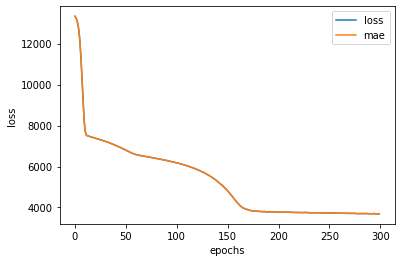

In [ ]:
# summarize history for loss
pd.DataFrame(History.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Tensorflow callbacks



*   Callbacks are functions that are used while training or learning
*   There is no way to stop training even if there is no improvment in learning. Also we can't change hyper parameters in between learning. this is where callbacks are used

way:

First define them

pass them in model.fit



1. Early stopping: It is a tensorflow component you can add to your model to stop training when it stops improving 

2. lambda check point: To save model at different times during training 

## Preprocessing (Normalization and Standardization)


Scale (Normalization) : MinMaxScaler, Default scaler used in NN. Converts values between 0 and 1. NN prefers Normalization.

Standardization: StandardScaler, every values in a column are replaced by there z-score. Caution: this reduces the effect of outliers.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

sklearn transformer: If does data transformation of the columns or dataframe

In [ ]:
# GET THE DATA READY 

#import
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# create x and y
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

# Build train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit the col transformer to training data
ct.fit(X_train)

# tranform training and test data
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)


In [ ]:
# Modelling

# build model architect
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'mae', patience = 5, min_delta = 2)

model_3.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mae,
                metrics = ['mae'])

history = model_3.fit(X_train, y_train, epochs=300, callbacks = [early_stop])



Epoch 1/300
30/30 [==============================] - 1s 4ms/step - loss: 13376.1016 - mae: 13376.1016
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 13368.9082 - mae: 13368.9082
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 13353.5234 - mae: 13353.5234
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 13323.0361 - mae: 13323.0361
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 13269.8076 - mae: 13269.8076
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 13186.1553 - mae: 13186.1553
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 13064.5088 - mae: 13064.5088
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 12898.1982 - mae: 12898.1982
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 12680.2285 - mae: 12680.2285
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 12403.56

Text(0, 0.5, 'loss')

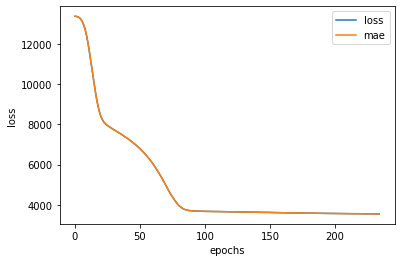

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

# Classification with Tensorflow

Binary classification: spam/not spam

Multiclass classification: what food this photo is

Multilabel classification: What tag should this article have?


In [ ]:
# For image classification problem 

# input tensor shape: 
# image  shape : [batch_size, width, height, color_channels] = [32, 224, 224, 3] 
# here pixels= 224*224
# So ndim = 4 
# output ndim = 1 (not zero as it is a multiclass classification problem so output is a vector is batch_size is 1)


## Typical arch of classification model

               Binary          multiclass

input_layer: shape=(224,224,3)      |  same

hidden_layer: (100, act = 'relu')     |same

output_layer: 1        |   no. of classes

Hidden_activation: relu | same

output_layer_act: sigmoid | softmax

Loss function: binarycrossentropy | CategoricalCrossentropy

optimizer: Adam/SGD | same (subjective)

metrics: accuracy

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state = 42)

circles = pd.DataFrame({"X0" :X[:, 0], "X1": X[:, 1], "label": y})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


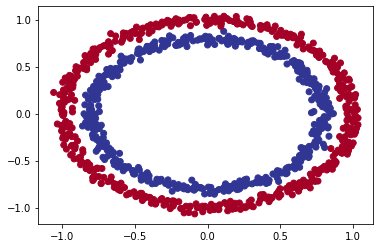

In [ ]:
# Visualize

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X = tf.constant(X, dtype = tf.float32)
y = tf.constant(y, dtype = tf.float32)

## steps in modeling

In [ ]:
 def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience=4)

model_1.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

history = model_1.fit(X, y, epochs = 300, callbacks=early_stop)

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 3.1784 - accuracy: 0.5000
Epoch 2/300
32/32 [==============================] - 0s 1ms/step - loss: 0.8313 - accuracy: 0.5000
Epoch 3/300
32/32 [==============================] - 0s 1ms/step - loss: 0.7387 - accuracy: 0.5000
Epoch 4/300
32/32 [==============================] - 0s 1ms/step - loss: 0.7116 - accuracy: 0.5000
Epoch 5/300
32/32 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 6/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 7/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 8/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4770
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4580
Epoch 10/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 11/300
32/32 [=

313/313 [==============================] - 0s 835us/step
doing binary classifcation...


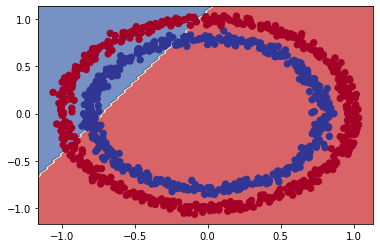

In [ ]:
plot_decision_boundary(model_1, X.numpy(), y.numpy())

If we dont define activation function in laeyr then it will be linear ( y=ax + b) by default

Non Linear activation functions: Relu, tanh, Sigmoid

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience=3)

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(X, y, epochs = 300, callbacks=early_stop, verbose = 0)

Text(0.5, 0, 'epochs')

<Figure size 720x720 with 0 Axes>

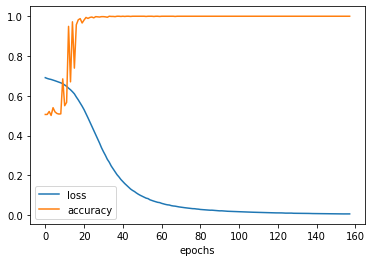

In [ ]:
plt.figure(figsize = (10,10))
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


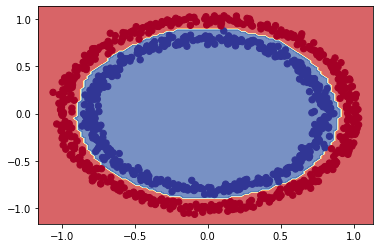

In [ ]:
plot_decision_boundary(model, X.numpy(), y.numpy())

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


How we improved:

Tried increasing no. of epochs: no imp

Changes optimizer from SGD to Adam: lil imp

Increased layers: no imp

Changed activation function in hidden and outpuut layer: lot of improvement

The combination of linear (straightlines) and Non-linear (non-straight lines) functions is one of the key fundamentals of NN 

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

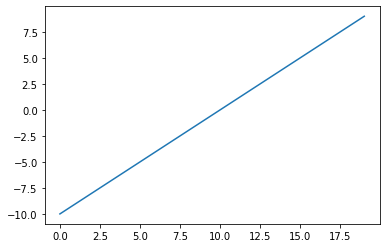

In [ ]:
# Visalize our tensor
plt.plot(A)

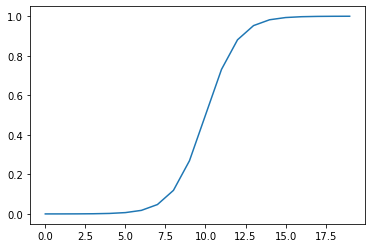

In [ ]:
# lets give A as input to sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# use it on A
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0,A)

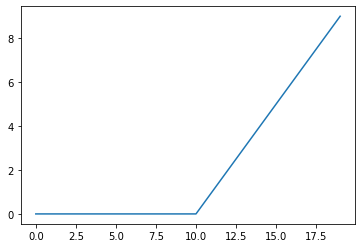

In [ ]:
rel_A = relu(A)
plt.plot(rel_A)

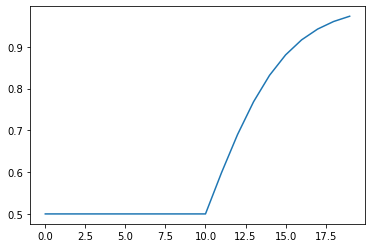

In [ ]:
plt.plot(sigmoid(0.3*rel_A+0.1*rel_A))

NNs use Non linear functions and linear functions to find patterns (mapping) in the data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size = 0.3, random_state = 42)
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

model_2.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = 'accuracy')

model_2.fit(X_train, y_train, epochs = 200, callbacks = [early_stop])

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4914
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.4971
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5171
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5300
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5286
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5357
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5471
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5800
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.6057
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.6886
Epoch 11/200
22/22 [=

In [ ]:
model_2.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 1.0000


[0.013061586767435074, 1.0]

313/313 [==============================] - 0s 893us/step
doing binary classifcation...
313/313 [==============================] - 0s 915us/step
doing binary classifcation...


[]

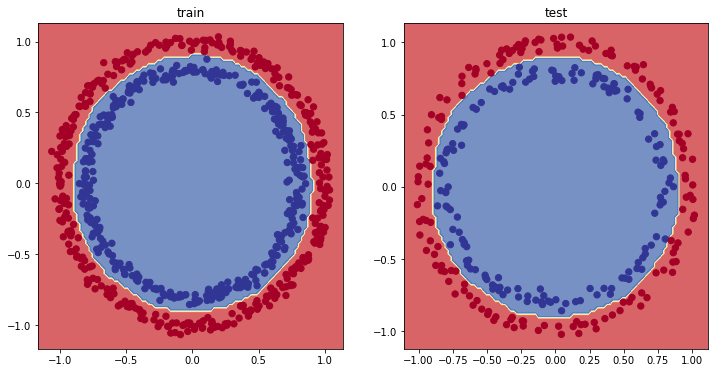

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_2, X=X_train.numpy(), y=y_train.numpy())
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_2, X_test.numpy(), y_test.numpy())
plt.plot()

## Finding the best learning rate

To find the ideal learning rate (the lr where the loss decreases the most during training). We are going to use the following steps:

* A learning rate **callback** 

* Another model

* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(), 
                loss = 'binary_crossentropy',
                metrics = 'accuracy')

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_3.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])



Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.6917 - accuracy: 0.4914 - lr: 1.0000e-04
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.4914 - lr: 1.1220e-04
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.4914 - lr: 1.2589e-04
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.4914 - lr: 1.4125e-04
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.4914 - lr: 1.5849e-04
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.4914 - lr: 1.7783e-04
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.4914 - lr: 1.9953e-04
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.4914 - lr: 2.2387e-04
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss:

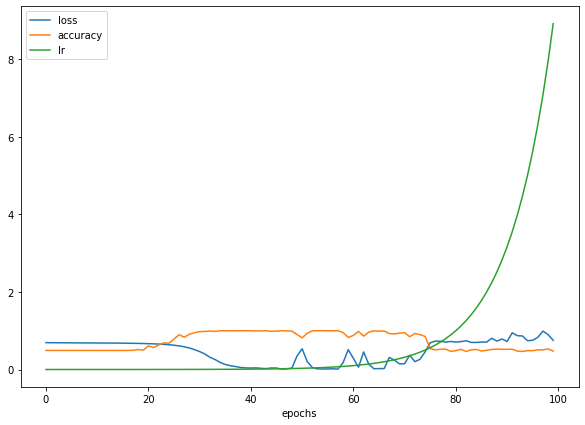

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7), xlabel = 'epochs')

from above plot we can find the lr where loss has dropped rapidly

Text(0, 0.5, 'loss')

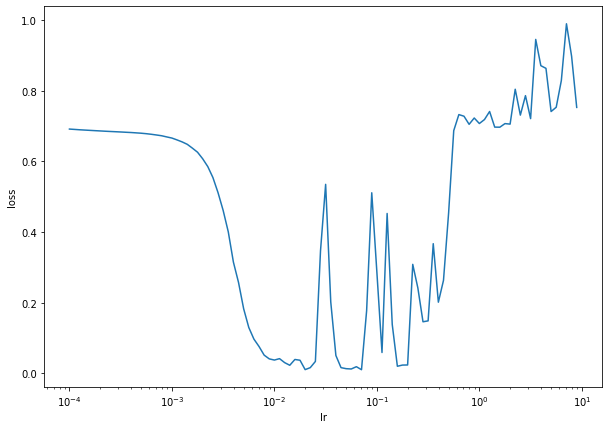

In [ ]:
plt.figure(figsize = (10, 7))
plt.semilogx(history.history['lr'], history.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')

idel lr is at the bottom of the loss drop. Here it is : 0.05 approx

In [ ]:
# Using default lr = 0.001
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_4.compile(optimizer = tf.keras.optimizers.Adam(), 
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model_4.fit(X_train, y_train, epochs = 50)

Epoch 1/50
22/22 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.4914
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.4914
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.4914
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.4914
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.4914
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.4914
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5714
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5671
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5657
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6014
Epoch 11/50
22/22 [

In [ ]:
# lets use ideal lr we found here

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_4.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.05), 
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model_4.fit(X_train, y_train, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.6043
Epoch 2/50
22/22 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7900
Epoch 3/50
22/22 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9543
Epoch 4/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9771
Epoch 5/50
22/22 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.9300
Epoch 6/50
22/22 [==============================] - 0s 1ms/step - loss: 0.1298 - accuracy: 0.9557
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9957
Epoch 8/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 9/50
22/22 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 11/50
22/22 [===========

Classification evaluation metrics:

1. Accuracy: tp + fp/(tp+fp+tn+fn)

2. Precision: tp/(tp+fp) , tf.keras.metrics.Precision(), high precision less fp

3. Recall: tp/(tp+fn) 


We cant have P and R both high. There is a trade-off between the two

4. F1-score: for imbalaced data

5. Confusion matrix : sklearn.metrics.confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tf.round(model_4.predict(X_test)))

10/10 [==============================] - 0s 2ms/step


array([[156,   0],
       [  0, 144]])

10/10 [==============================] - 0s 2ms/step


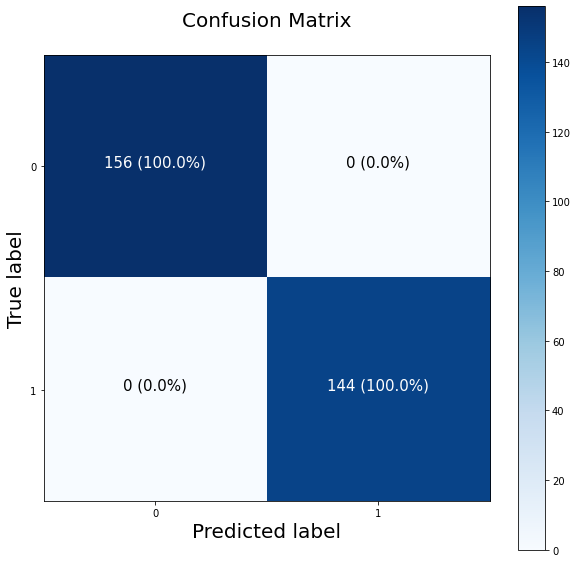

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
y_preds = model_4.predict(X_test)
figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## MultiClass Classification

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show first training eg
print(f"training sample:\n {train_data[0, :, :]}\n")
print(f"training labels:\n {train_labels[0]}\n")

training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

(60000, 28, 28)

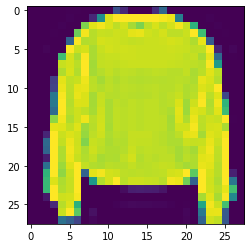

In [ ]:
plt.imshow(train_data[7])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Sandal')

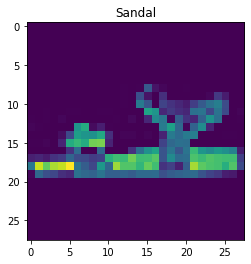

In [ ]:
index = 59999
plt.imshow(train_data[index])
plt.title(class_names[train_labels[index]])

A node will output a value

A layer will output a vector

Architecture of model can be similar to binary but hyperparameters will be different

oupt layer act: softmax

**Flatten layer**

Since we have to pass vector to the NN 1st hidden layer but an example of image is a matrix so we have to flatten it.

tf.keras.layers.Flatten(input_shape = (28, 28))

It does not affect the batch size

Vector size will be : 28*28

**SparseCatgorical vs Categorical crossentropy**

SparseCategorical: we can provide label as integers. Should be used when labels are mutually exclusive

Catgorical: Labels has to given in one hot encoded form

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),

    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_1.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

non_norm_history = model_1.fit(train_data, train_labels,
                             epochs = 10,
                             validation_data = (test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6942 - accuracy: 0.3805 - val_loss: 1.2953 - val_accuracy: 0.5355
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1395 - accuracy: 0.5772 - val_loss: 1.0469 - val_accuracy: 0.5999
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9885 - accuracy: 0.6129 - val_loss: 0.9564 - val_accuracy: 0.6291
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9285 - accuracy: 0.6359 - val_loss: 0.9135 - val_accuracy: 0.6540
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8955 - accuracy: 0.6510 - val_loss: 0.8861 - val_accuracy: 0.6655
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8718 - accuracy: 0.6604 - val_loss: 0.8663 - val_accuracy: 0.6649
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8527 - accuracy: 0.6709 - val_loss: 0.8485 - val_accuracy:

## Normalizing

In [ ]:
train_data = train_data/255.0
test_data = test_data/255.0

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),

    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

norm_history = model_2.fit(train_data, train_labels,
                             epochs = 10,
                             validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6942 - accuracy: 0.3805 - val_loss: 1.2953 - val_accuracy: 0.5355
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1395 - accuracy: 0.5772 - val_loss: 1.0469 - val_accuracy: 0.5999
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9885 - accuracy: 0.6129 - val_loss: 0.9564 - val_accuracy: 0.6291
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9285 - accuracy: 0.6359 - val_loss: 0.9135 - val_accuracy: 0.6540
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8955 - accuracy: 0.6510 - val_loss: 0.8861 - val_accuracy: 0.6655
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8718 - accuracy: 0.6604 - val_loss: 0.8663 - val_accuracy: 0.6649
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8527 - accuracy: 0.6709 - val_loss: 0.8485 - val_accuracy

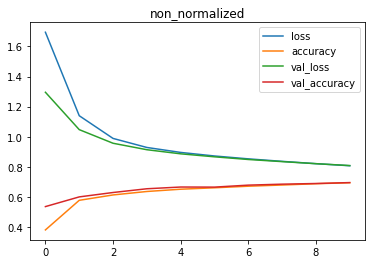

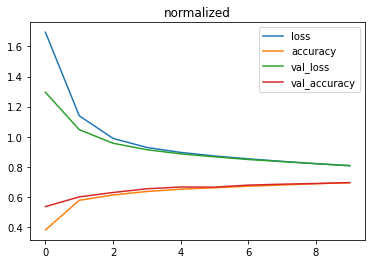

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title="non_normalized")
pd.DataFrame(norm_history.history).plot(title="normalized")

In [ ]:
model_2.layers

In [ ]:
weights, biases = model_2.layers[1].get_weights()

weights, weights.shape

(array([[ 0.02870099, -0.01028891, -0.19484472,  0.01410255, -0.25639018],
        [ 0.03220839,  0.04187848, -0.3691464 ,  0.09644052, -0.45488083],
        [-0.03306989,  0.0387772 , -0.7460739 ,  0.9008972 , -0.7270978 ],
        ...,
        [ 0.03679805,  0.00694549,  0.5748441 , -0.3921023 ,  0.5523883 ],
        [ 0.06350937,  0.02962057, -0.10401286, -0.18418317, -0.05841099],
        [-0.06865042,  0.08211339, -0.17244087,  0.23994687, -0.1885972 ]],
       dtype=float32), (784, 5))

bias vector is initialized as zeros

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [ ]:
biases, biases.shape

(array([-0.00709536, -0.00835803,  0.29037425,  0.3994992 ,  0.18317957],
       dtype=float32), (5,))

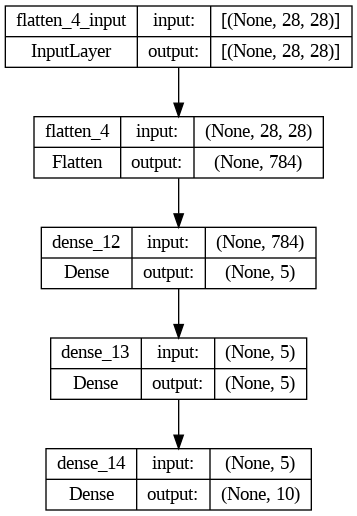

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes = True)

# CNN and Computer Vision with Tf


Computer Vision problems: AutoDriving

Most popular DNN architecture for CV problems: CNN

Food vision problem:

Input_shape: (batch_size, width, height, color channels)

Output shape: vector (no_of_classes, )

## Typical Architecture of a CNN

input image: images we want to find patterns in

Input Layer: Takes in target and preprocess them for further layers, nput_shape: (batch_size, width, height, color channels)


Convolutional layer: Extracts/learns most imp features from the target images,
tf.keras.layers.ConvXD ( X can be any value)

Hidden activation: add non-linearity to learned features, activation = 'relu'

Pooling Layer: Reduces the Dimensionality of learned features,
tf.keras.layers.MaxPool2D/AvgPool2D

Flatten layer: no parameters. Simply flattens input into a vector

Fully connected layer: Further refines learned featres from conv layers

Output layer

Output activation: add non-linearity, sigmoid or softmax


In [ ]:
# get the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-04 15:29:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.127.128, 2a00:1450:4013:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.7MB/s    in 3.4s    

2023-02-04 15:29:28 (30.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import tensorflow as tf
import pandas as pd

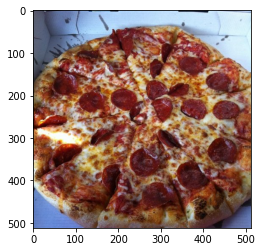

In [ ]:
img = mpimg.imread("/content/pizza_steak/test/pizza/1001116.jpg")
plt.imshow(img)
img_t = tf.constant(img)


Its imp to normalize the img data. divide by 255

## Building end to end CNN Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed for repr
tf.random.set_seed(42)

# preprocess
# Normalize
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


ImageDataGenerator is used to:
1. Transform the image data. It will normalize and also attach lables based on the value we give in class_mode

2. Data Augmentation

Creatnig a tiny VGG model

**epoch** : In one epoch all the training examples are covered.

if **batch_size** = all training examples then 1 iteration will take place in 1 epoch. A batch is a small subset of training data which a model looks at a time.
Reason:
1. memory issue 
2. learn patterns in 1M images at once leads to poor learning.


if batch size = 25 and training size = 100: Then there will be (100/25) 4 iterations in 1 epoch
NOTE: Model weights will be updated 4 times


In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(optimizer = tf.keras.optimizers.Adam(), loss= 'binary_crossentropy',
                metrics = ['accuracy'])

# train data has labels also
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))
                        

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5632 - accuracy: 0.7040 - val_loss: 0.4011 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4283 - accuracy: 0.8080 - val_loss: 0.3718 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3910 - accuracy: 0.8267 - val_loss: 0.3498 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3785 - accuracy: 0.8320 - val_loss: 0.3316 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3219 - accuracy: 0.8673 - val_loss: 0.3054 - val_accuracy: 0.8880


Reason to create batches: If we give all images at once our computer can go out of memory


first epoch takes longer time to load all the data into memory

By switching to GPU time decreased a lot. From 5 min to 53 seconds

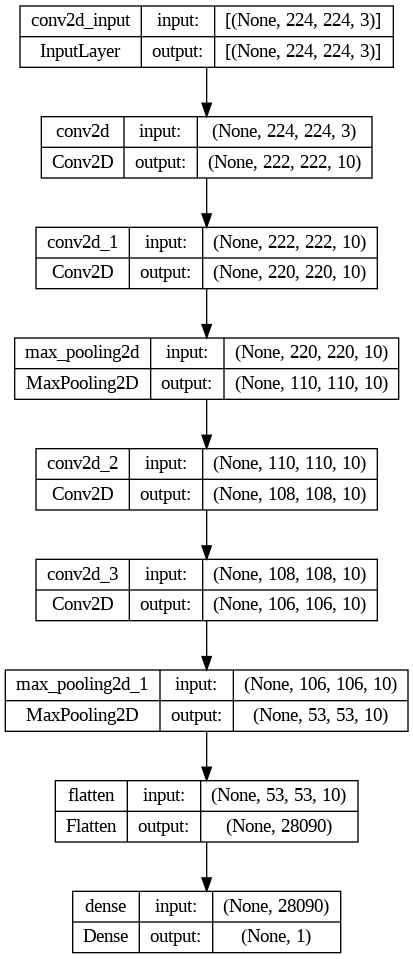

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes = True)

## Try classifying without any convolutinal layer

In [ ]:
tf.random.set_seed(42)
model_wc = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_wc.compile(optimizer = tf.keras.optimizers.Adam(), 
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

model_wc.fit(train_data,
             epochs = 5,
             steps_per_epoch = len(train_data),
             validation_data = valid_data,
             validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 1.5173 - accuracy: 0.6553 - val_loss: 1.1796 - val_accuracy: 0.5960
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.7918 - accuracy: 0.6487 - val_loss: 0.5823 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5708 - accuracy: 0.6753 - val_loss: 0.5496 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.5448 - accuracy: 0.7380 - val_loss: 0.5133 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.5272 - accuracy: 0.7560 - val_loss: 0.4877 - val_accuracy: 0.7980


In [ ]:
model_wc.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 10)                1505290   
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,505,351
Trainable params: 1,505,351
Non-trainable params: 0
_________________________________________________________________


Total params: 1M
in model1, total 

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

Total params in tiny VGG: 31k

In [ ]:
print(f"normal model has {1000000/31000} times more params than conv model")


normal model has 32.25806451612903 times more params than conv model


CNN seeks to sort out and learn the most imp patterns in an image. Thus even with less learnable params it performs well

In [ ]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

Strategy: Create a Base model. Then do experiments to improve it.

In [ ]:
# making the model arch creation little easier

#importing optimizer
from tensorflow.keras.optimizers import Adam

#importing layers needed
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

#importing Seq
from tensorflow.keras import Sequential

**filter**: sliding windows that convovle over input image. Feature extractor. Higher value of filter more complex model

**Kernel_size**: shape of filter

**padding**: to preserve edge pixel info. if padding = 'same', output size will be same as input. if "valid" output shape will be compressed

stride: no. of steps a filter takes at a time

In [ ]:
model_1 = Sequential([
    Conv2D(filters = 3, kernel_size = 3, strides = 1, padding = "valid",
           activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_1.compile(optimizer = Adam(), loss= 'binary_crossentropy',
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
            validation_data = valid_data,validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 204ms/step - loss: 1.9682 - accuracy: 0.6440 - val_loss: 0.5133 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 16s 342ms/step - loss: 0.4628 - accuracy: 0.8020 - val_loss: 0.4058 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 15s 312ms/step - loss: 0.3727 - accuracy: 0.8433 - val_loss: 0.4043 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.2262 - accuracy: 0.9207 - val_loss: 0.5096 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 12s 267ms/step - loss: 0.0980 - accuracy: 0.9727 - val_loss: 0.6500 - val_accuracy: 0.7920


In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs") 
  plt.legend()
  plt.show()

  # plot accuracy
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs") 
  plt.legend()

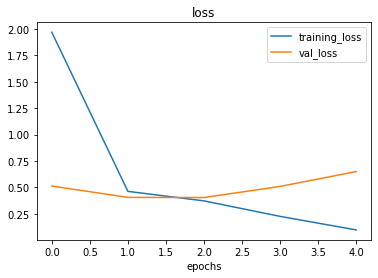

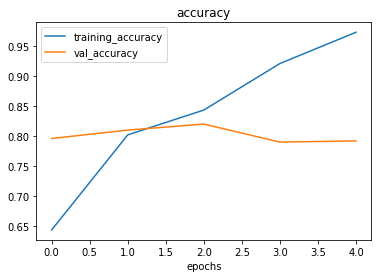

In [ ]:
plot_loss_curves(history_1)

**Problem1 : Overfitting**
From Model_1 val_accuracy is not going up as train_acc

**Solution:**
add max pool layer, data aug


Steps to fit model in CNN:

1. create base line model
2. Beat base model
3. Reduce overfitting

Ways to induce overfitting
* Increase no. of conv layers
* Inc no. of conv filters
* Add another dense layer

Reduce overfitting
* Add data augmentation
* Add regularization layers (such as Maxpool)
* Add more data

In [ ]:
# Adding more conv layers
tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(10, 3, activation = 'relu', 
           input_shape = train_data.next()[0].shape[1:4]),
    MaxPool2D(pool_size = 2, padding = 'valid'),

    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),

    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2, padding = 'valid'),

    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_2.compile(optimizer = Adam(), loss= 'binary_crossentropy',
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
            validation_data = valid_data,validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 218ms/step - loss: 0.5956 - accuracy: 0.6840 - val_loss: 0.4802 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4579 - accuracy: 0.7920 - val_loss: 0.3636 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4087 - accuracy: 0.8173 - val_loss: 0.3747 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3792 - accuracy: 0.8407 - val_loss: 0.3420 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3823 - accuracy: 0.8320 - val_loss: 0.3140 - val_accuracy: 0.8760


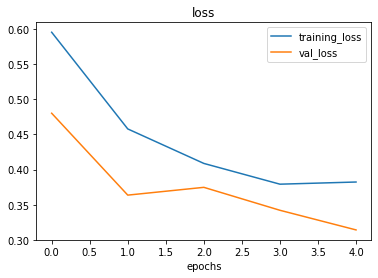

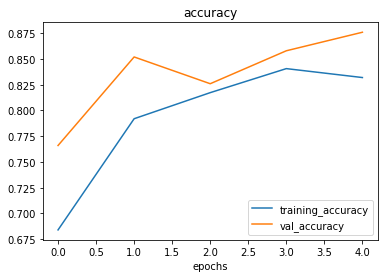

In [ ]:
plot_loss_curves(history_2)

In model_2 we added max pool layers after every conv layers. This helped because **max_pool layers reduces parametes and thus its also a** **regularizarion layer**

## Data Augmentation

It is the process of altering the training data leading to more diversity. This allows our models to learn more generalizable patterns. 

Altering means: flipping, Rotating, cropping... 

Data Augmentation is usually performed on the training_data. 

Using imageDataGenerator our images are left as they are in the directory but are modified when they are loaded into the model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)
img_size = (224, 224)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                            target_size = img_size,
                                                            batch_size = 32,
                                                            class_mode = "binary",
                                                            shuffle = False)

train_datagen_nonaugmented = ImageDataGenerator(rescale = 1./255)
train_data_nonaugmented = train_datagen_nonaugmented.flow_from_directory(train_dir,
                                                            target_size = img_size,
                                                            batch_size = 32,
                                                            class_mode = "binary",
                                                            shuffle = False)

test_datagen= ImageDataGenerator(rescale = 1./255)
test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size = img_size,
                                                batch_size = 32,
                                                class_mode = "binary",
                                                shuffle = False)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
aug_image, aug_labels = train_data_augmented.next() # taking a batch
non_aug_image, non_aug_labels = train_data_nonaugmented.next()

Text(0.5, 1.0, '0.0')

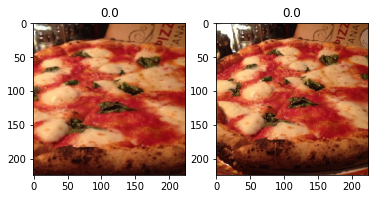

In [ ]:
import random
index = random.randint(0, 32)
plt.subplot(1,2,1)
plt.imshow(aug_image[index])
plt.title(aug_labels[index])
plt.subplot(1,2,2)
plt.imshow(non_aug_image[index])
plt.title(non_aug_labels[index])

## Fitting model on augmented data

In [ ]:
tf.random.set_seed(42)

model_3 = Sequential([
    Conv2D(10, 3, activation = "relu", 
           input_shape = train_data_augmented.next()[0].shape[1:4]),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(optimizer = Adam(),
                loss = 'binary_crossentropy',
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 572ms/step - loss: 0.7033 - accuracy: 0.5327 - val_loss: 0.6832 - val_accuracy: 0.5660
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.7010 - accuracy: 0.5113 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 21s 442ms/step - loss: 0.6876 - accuracy: 0.5133 - val_loss: 0.6636 - val_accuracy: 0.6040
Epoch 4/5
47/47 [==============================] - 21s 437ms/step - loss: 0.6836 - accuracy: 0.5893 - val_loss: 0.6244 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6811 - accuracy: 0.6047 - val_loss: 0.6054 - val_accuracy: 0.7880


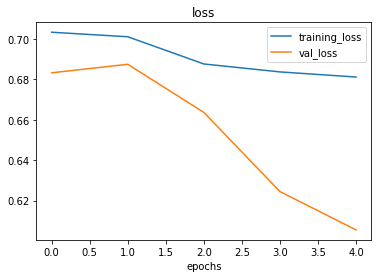

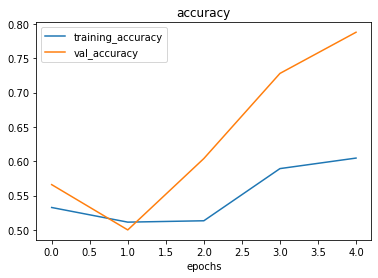

In [ ]:
plot_loss_curves(history_3)

Trying shuffling

In classification shuffling is imp as the model gets exposed to all diff kinds of data during training.

In [ ]:
train_data_aug_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size = img_size,
                                                                         class_mode = 'binary',
                                                                         batch_size = 32,
                                                                         shuffle  =True)

Found 1500 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(10, 3, activation = "relu", 
           input_shape = train_data_augmented.next()[0].shape[1:4]),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(optimizer = Adam(),
                loss = 'binary_crossentropy',
                metrics = ["accuracy"])

history_4 = model_4.fit(train_data_aug_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 37s 578ms/step - loss: 0.6427 - accuracy: 0.6260 - val_loss: 0.5453 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 24s 510ms/step - loss: 0.5577 - accuracy: 0.7193 - val_loss: 0.4163 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5295 - accuracy: 0.7313 - val_loss: 0.4957 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 26s 558ms/step - loss: 0.4949 - accuracy: 0.7653 - val_loss: 0.3756 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 24s 507ms/step - loss: 0.4957 - accuracy: 0.7613 - val_loss: 0.3401 - val_accuracy: 0.8620


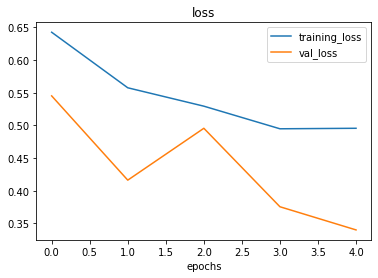

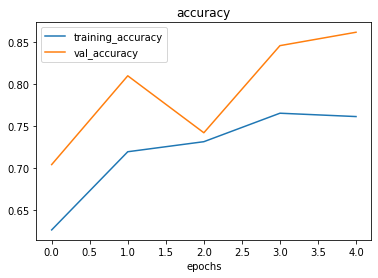

In [ ]:
plot_loss_curves(history_4)

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
  # read image
  img = tf.io.read_file(filename)
  
  # convert it into tensor
  img = tf.image.decode_image(img)
  
  # Resize
  img = tf.image.resize(img , size =(img_shape, img_shape))

  # Rescale
  img = img/255.
  
  if img.ndim == 3:
    img = tf.expand_dims(img, axis = 0)
  return img

In [ ]:
s1 = load_and_prep_image("/content/pizza_steak/test/steak/108310.jpg")
pred = model_4.predict(s1)

1/1 [==============================] - 0s 17ms/step


In [ ]:
s2 = load_and_prep_image("/content/pizza_steak/test/pizza/1001116.jpg")
pred = model_4.predict(s2)

1/1 [==============================] - 0s 15ms/step


In [ ]:
def load_pred_and_plot(model, filename, img_size=224):

  # Loading and prep image 
  # read image
  img = tf.io.read_file(filename)
  
  # convert it into tensor
  img = tf.image.decode_image(img)
  
  # Resize
  img = tf.image.resize(img , size =(img_size, img_size))

  # Rescale
  img = img/255.
  
  if img.ndim == 3:
    img = tf.expand_dims(img, axis = 0)

  # predicting 
  pred = model.predict(img)
   
  # Plotting
  class_names = ['pizza', 'steak']

  pred_class = class_names[int(tf.round(pred))]
  print(f"model says its a: {pred_class}")
  plt.imshow(img[0])

1/1 [==============================] - 0s 17ms/step
model says its a: steak


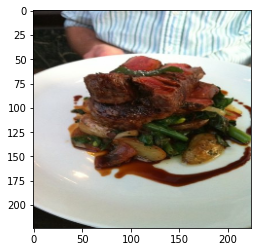

In [ ]:
load_pred_and_plot(model_4, "/content/pizza_steak/test/steak/108310.jpg")

## Multiclass Image Classification

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs") 
  plt.legend()
  plt.show()

  # plot accuracy
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs") 
  plt.legend()

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-04 17:34:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.2MB/s    in 22s     

2023-02-04 17:35:10 (22.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([i.name for i in data_dir.glob('*')]))

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## Preprocess the data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size  = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size  = 32,
                                               class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras import Sequential
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(10, 3 ,activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3 ,activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_1 = model_1.fit(train_data, epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 215ms/step - loss: 2.0800 - accuracy: 0.2488 - val_loss: 1.9344 - val_accuracy: 0.3256
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.8585 - accuracy: 0.3577 - val_loss: 1.9063 - val_accuracy: 0.3444
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.5502 - accuracy: 0.4736 - val_loss: 1.9078 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 0.9982 - accuracy: 0.6679 - val_loss: 2.3005 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 56s 240ms/step - loss: 0.4682 - accuracy: 0.8536 - val_loss: 3.1573 - val_accuracy: 0.3104


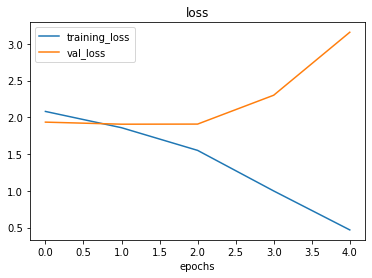

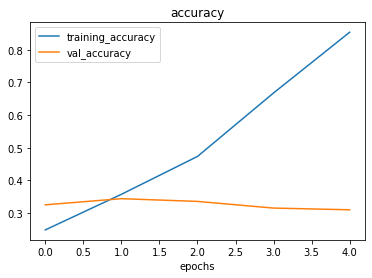

In [ ]:

plot_loss_curves(history_1)

It seems like overfitting

## Adjust the model hyperparameters to beat base model


to reduceover fitting 

1. get more data
2. Simplify the model
3. Data augmentation
4. Transfer learning


In [ ]:
# Reducing one conv layer
tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(10, 3 ,activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_2 = model_2.fit(train_data, epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 223ms/step - loss: 2.0989 - accuracy: 0.2501 - val_loss: 1.9925 - val_accuracy: 0.2524
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.7805 - accuracy: 0.3947 - val_loss: 1.9024 - val_accuracy: 0.3488
Epoch 3/5
235/235 [==============================] - 46s 196ms/step - loss: 1.4225 - accuracy: 0.5361 - val_loss: 1.9843 - val_accuracy: 0.3504
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 0.9616 - accuracy: 0.7012 - val_loss: 2.1574 - val_accuracy: 0.3340
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.5380 - accuracy: 0.8483 - val_loss: 2.5269 - val_accuracy: 0.3140


Since total params increased so val_loss decreased

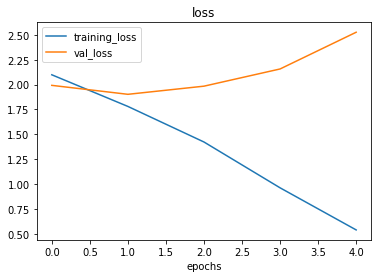

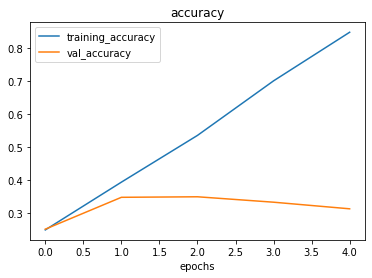

In [ ]:
plot_loss_curves(history_2)

Trying Data Augmentation

In [ ]:
from tensorflow._api.v2.random import shuffle
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size  = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size  = 32,
                                               class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## This time cloning the model

Model can be copied/cloned by using: tf.keras.models.clone_model()

clone model just copies the model architecture and not weights

**Challenge**: Overfitting

Solution: try1: adding max pool layer, 
Data Augmentation

In [ ]:
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = "categorical_crossentropy",
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data, epochs = 5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 116s 489ms/step - loss: 2.1241 - accuracy: 0.2260 - val_loss: 1.9819 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 113s 483ms/step - loss: 1.9473 - accuracy: 0.3145 - val_loss: 1.8433 - val_accuracy: 0.3572
Epoch 3/5
235/235 [==============================] - 122s 521ms/step - loss: 1.8675 - accuracy: 0.3532 - val_loss: 1.8766 - val_accuracy: 0.3532
Epoch 4/5
235/235 [==============================] - 120s 511ms/step - loss: 1.7957 - accuracy: 0.3808 - val_loss: 1.7720 - val_accuracy: 0.3880
Epoch 5/5
235/235 [==============================] - 112s 475ms/step - loss: 1.7616 - accuracy: 0.3956 - val_loss: 1.7039 - val_accuracy: 0.4140


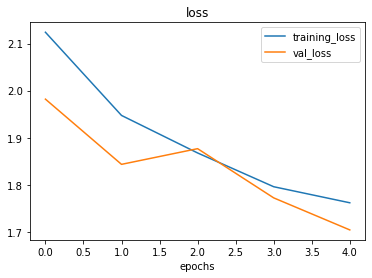

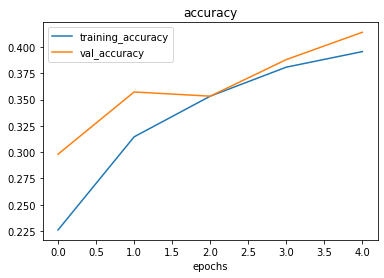

In [ ]:
plot_loss_curves(history_3)

We got rid of overfitting ! 
Now we are somewhat certain that if we train for longer than we will get better val_acc

## Save and load model

In [ ]:
model_3.save("model_3")

In [ ]:
loaded_model_3 = tf.keras.models.load_model("model_3")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 1.7039 - accuracy: 0.4140


[1.703921914100647, 0.414000004529953]

# Transfer learning with TF

ImageNet: benchmark dataset, It has all sorts of things

We can leverage state of the art trained parameters and use them in our case

We can use:
1. existiing NN architecture proven to work on problems similar to ours.

2. Can leverage a working NN arch with already learned patterns on similar data to our own. Eg. EfficientNet

In [ ]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-05 13:47:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   188MB/s    in 0.9s    

2023-02-05 13:47:21 (188 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



Its Last used data but just less data. We will still get good results using transfer learning

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras import Sequential
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Some callbacks

1. Tracking exp with the **Tensorboard callback** (We dint saw all above models in one place)
2. Model checkpoint with the modelcheckpoint callback
3. Early stop

In [ ]:
# Create Tensorboard callback 
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving tensorboard log files to: {log_dir}")
  return tensorboard_callback

## TensorHub

In past we developed models from scratch laeyr by layer

Now we are going to do a similar process, except the majority of our model layers are going to come from tensorhub

**TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.**


some good classification model archs : 
1. ResNet (ressidual NN)
2. EfficientNet

### feature Extraction using effnet

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
effNet_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [ ]:
import tensorflow_hub as hub

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs") 
  plt.legend()
  plt.show()

  # plot accuracy
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs") 
  plt.legend()

In [ ]:
def create_model(model_url, num_classes = 10):
  """ 
  Takes a tensorflow hub URL and create a Keras Sequential model with it.

  Args: 
    model_url: A tensorflow Hub feature extraction URL
    num_classes: In output layer

  Returns: 
    An uncompiled sequential model 
  """
  # Download the pretrained model and save it as keras layer
  feature_extractor_layer = hub.KerasLayer(model_url, trainable = False,
                                           name = "feature_ext_layer",
                                           input_shape = (224, 224, 3))
  # freezing already learned weights
  
  # Create our own model
  # Uptill conv layers we imported already trained model and froze learning
  # Now we will add our own dense layer on top

  model = tf.keras.Sequential([
      feature_extractor_layer,
      Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])

  return model


Residual NNN:

Very ver deep NN are hard to train due to **vanishing/exploding gradient descent **issue. 

Resnets use **skip connections** and are thus made up of residual blocks.

Its possible to train a very deep NN using skip connections.

In [ ]:
resnet_model = create_model(resnet_url, 10)

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_ext_layer (KerasLay  (None, 2048)             23564800  
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


**We have 23M params but only 20k trainable**

In [ ]:
resnet_model.compile(optimizer = tf.keras.optimizers.Adam(),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

resnet_history = resnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [create_tensorboard_callback(
                                      dir_name = "tensorhub",
                                      experiment_name="resnet50v2"
                                  )])

Saving tensorboard log files to: tensorhub/resnet50v2/20230205-134821
Epoch 1/5
24/24 [==============================] - 23s 786ms/step - loss: 1.8950 - accuracy: 0.3613 - val_loss: 1.1511 - val_accuracy: 0.6348
Epoch 2/5
24/24 [==============================] - 16s 698ms/step - loss: 0.8709 - accuracy: 0.7480 - val_loss: 0.8537 - val_accuracy: 0.7212
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.6128 - accuracy: 0.8080 - val_loss: 0.7674 - val_accuracy: 0.7496
Epoch 4/5
24/24 [==============================] - 21s 898ms/step - loss: 0.4776 - accuracy: 0.8627 - val_loss: 0.7011 - val_accuracy: 0.7684
Epoch 5/5
24/24 [==============================] - 16s 695ms/step - loss: 0.3671 - accuracy: 0.9173 - val_loss: 0.6827 - val_accuracy: 0.7796


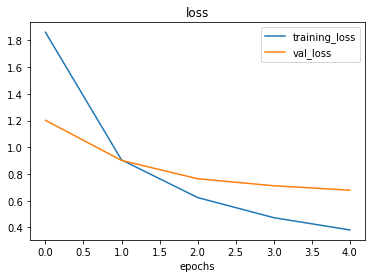

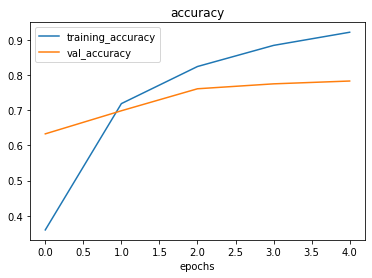

In [ ]:
plot_loss_curves(resnet_history)

**THIS IS THE POWER OF TRANSFER LEARNING**

We just used 10% of data and we got 75% accuracy on val_data

This was transfer learning for feature extraction

In [ ]:
n = np.array(["k", 1, 2])
n

array(['k', '1', '2'], dtype='<U21')

Since k cant be made a no. so 1 and 2 will be converted to strings

In [ ]:
l = ["k", 1, 2]

lists can be homogeneous or heterogenous

Numpy array will finally be homogenous

lists consume more memory than numpy array

operation done on lists consume more time than numpy arrays

Trying EffNet model

In [ ]:
effnet_model = create_model(effNet_url, num_classes = 10)

effnet_model.compile(optimizer = tf.keras.optimizers.Adam(),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

effnet_history = effnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [create_tensorboard_callback(
                                      dir_name = "tensorhub",
                                      experiment_name="effnet"
                                  )])

Saving tensorboard log files to: tensorhub/effnet/20230205-125259
Epoch 1/5
24/24 [==============================] - 28s 723ms/step - loss: 1.9056 - accuracy: 0.3987 - val_loss: 1.3377 - val_accuracy: 0.7132
Epoch 2/5
24/24 [==============================] - 16s 666ms/step - loss: 1.0946 - accuracy: 0.7747 - val_loss: 0.8878 - val_accuracy: 0.8152
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.7713 - accuracy: 0.8387 - val_loss: 0.7129 - val_accuracy: 0.8428
Epoch 4/5
24/24 [==============================] - 16s 673ms/step - loss: 0.6194 - accuracy: 0.8733 - val_loss: 0.6222 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 44s 2s/step - loss: 0.5244 - accuracy: 0.8867 - val_loss: 0.5687 - val_accuracy: 0.8604


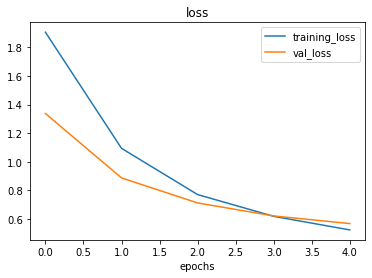

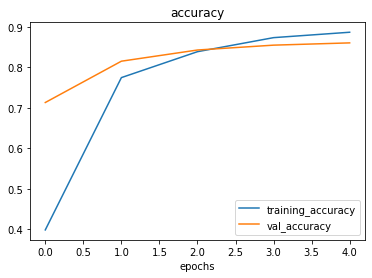

In [ ]:
plot_loss_curves(effnet_history)

In [ ]:
effnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_ext_layer (KerasLay  (None, 1280)             4049564   
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


We improved on acc using less frozen params

## Types of transfer learning

1. As in transfer learning Use an existing model with no changes as it is

2. **Feature extraction transfer learning**: Use pretrained weights for extracting features and add our own output laeyer on top

3. **Fine tuning transfer learning**: 
Use the pre learned patterns of an existing model and fine-tune many or all of the underlying layers. Unfreeze some or all the layers.

In [ ]:
print("total layers in effnet:")
len(effnet_model.layers[0].weights)

total layers in effnet:


309

## Using tensorboard

It is a way to optimize model

Host, track and share ML experiments on TensorBoard.dev

In [ ]:
 # upload an experiment on tensorboard dev (It is already in colab env)
 !tensorboard dev upload --logdir ./tensorhub/ \
  --name "Eff vs resnet" \
  --description "Comparing 2 diff TF hub feat ext model archs" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/TqFBHjHvT0aSj4Nh8jieqA/

[2023-02-05T13:54:36] Started scanning logdir.
[2023-02-05T13:54:38] Total uploaded: 60 scalars, 0 tensors, 2 binary objects (3.0 MB)
[2023-02-05T13:54:38] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/TqFBHjHvT0aSj4Nh8jieqA/


In [ ]:
# get list of all the experiments
!tensorboard dev list

https://tensorboard.dev/experiment/TqFBHjHvT0aSj4Nh8jieqA/
	Name                 Eff vs resnet
	Description          Comparing 2 diff TF hub feat ext model archs
	Id                   TqFBHjHvT0aSj4Nh8jieqA
	Created              2023-02-05 13:54:36 (7 minutes ago)
	Updated              2023-02-05 13:54:38 (7 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  3121884
Total: 1 experiment(s)


In [ ]:
# Delete an exp
#!tensorboard dev delete --experiment_id ""

If we are fine tuning then we require more data as compared to as in transfer learning

# Transfer Learning Fine tuning

A Good way to prevent running functions again and again is to create a helper.py file which has all the functions we want

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras import Sequential
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"



In [ ]:
!wget https://raw.githubusercontent.com/Rajvardhan7/TensorFlow/main/Extras/helper_functions.py
import helper_functions
dir(helper_functions)

from helper_functions import create_tensorboard_callback, plot_loss_curves, pred_and_plot, unzip_data


--2023-02-06 18:22:29--  https://raw.githubusercontent.com/Rajvardhan7/TensorFlow/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-06 18:22:29 (100 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-02-06 18:22:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 142.250.145.128, 108.177.96.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  38.6MB/s    in 4.7s    

2023-02-06 18:22:35 (34.0 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
img_size = (224, 224)

train_data = image_dataset_from_directory(directory = train_dir,
                                          image_size = img_size,
                                          label_mode = "categorical",
                                          batch_size = 32)


test_data = image_dataset_from_directory(directory = test_dir,
                                          image_size = img_size,
                                          label_mode = "categorical",
                                          batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Functional vs Sequential API

similarities: compiling, fitting, evalating

Difference: 
1. Model Construction- With func API more sophisticated models can be produced. Sequential API runs layers in sequential order.



## Feature Extraction model with keras Functional API

In [ ]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = "input_layer")

# Creating base model -- feature extractor
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Pass input to the base model
x = base_model(inputs)

# Avg pool the outputs 
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_pool")(x)
print(f"shape after global_pooling {x.shape}")

# Create output layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = "OL")(x)

# Combime the inputs and outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# Compile
model_0.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

history_model_0 = model_0.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = int(0.25 * len(test_data)),
                              callbacks = [create_tensorboard_callback(
                                   dir_name = "tensorhub",
                                   experiment_name = "feat_ext_effBO"
                               )])

16705208/16705208 [==============================] - 2s 0us/step
shape after global_pooling (None, 1280)
Saving TensorBoard log files to: tensorhub/feat_ext_effBO/20230206-140835
Epoch 1/5
24/24 [==============================] - 20s 268ms/step - loss: 1.9072 - accuracy: 0.4133 - val_loss: 1.3078 - val_accuracy: 0.7352
Epoch 2/5
24/24 [==============================] - 5s 185ms/step - loss: 1.1156 - accuracy: 0.7627 - val_loss: 0.8603 - val_accuracy: 0.8339
Epoch 3/5
24/24 [==============================] - 5s 193ms/step - loss: 0.7974 - accuracy: 0.8213 - val_loss: 0.6667 - val_accuracy: 0.8668
Epoch 4/5
24/24 [==============================] - 5s 196ms/step - loss: 0.6334 - accuracy: 0.8600 - val_loss: 0.5792 - val_accuracy: 0.8750
Epoch 5/5
24/24 [==============================] - 5s 196ms/step - loss: 0.5530 - accuracy: 0.8787 - val_loss: 0.5210 - val_accuracy: 0.8783


NOTE: Efficient nate (base model) has a rescaling layer included

In [ ]:
base_model.layers[0:5]

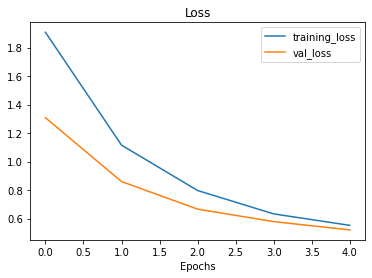

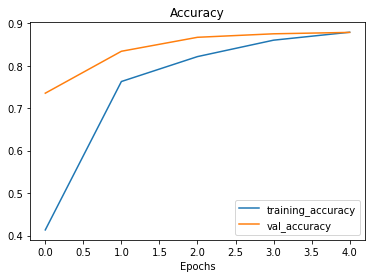

In [ ]:
plot_loss_curves(history_model_0)

GlobalAveragePooling takes average of the entire matrix. For: eg if we finally get 1228 filters - (7,7,1228) then all 7*7 matrix or feature maps will be averaged.

Insted of flattening to get a vector for dense output layer the above can be used

replicating GlobalAveragePooling tensor

In [ ]:
t = tf.random.normal((1,4,4,3))
gt = tf.keras.layers.GlobalAveragePooling2D()(t)
print("normal tensor")
print(t)
print(t.shape)

print("gt tensor")
print(gt)

print("replicated: using our own")
rt = tf.reduce_mean(t, axis = [1,2])
print(rt)

normal tensor
tf.Tensor(
[[[[-0.28174764  0.78905576  0.759715  ]
   [-0.35639814 -0.8331347  -0.11628755]
   [-0.03422423 -0.27325827  0.83518803]
   [ 0.04123394 -1.3970888   0.5527731 ]]

  [[-0.61885256  1.2799219   1.3424276 ]
   [ 4.0937696  -1.0333186  -0.9402739 ]
   [ 0.951139   -0.28273708  0.16658586]
   [ 0.4790399  -0.88418233  1.7646583 ]]

  [[-0.9057416   1.3918602  -0.7284867 ]
   [ 1.2560219  -0.5280169   1.1502427 ]
   [ 1.9435593  -1.45375    -0.2012536 ]
   [-0.9381039   2.1168706   0.35023245]]

  [[ 0.94185585 -0.69866234  1.5482305 ]
   [-0.67341775  0.72341704  0.7910182 ]
   [-1.054592   -0.27033332  0.81188613]
   [-0.46129593 -0.4977555   0.554248  ]]]], shape=(1, 4, 4, 3), dtype=float32)
(1, 4, 4, 3)
gt tensor
tf.Tensor([[ 0.27389038 -0.11569452  0.5400565 ]], shape=(1, 3), dtype=float32)
replicated: using our own
tf.Tensor([[ 0.27389038 -0.11569452  0.5400565 ]], shape=(1, 3), dtype=float32)


A pretrained model outputs a **feature vector**. A feature vector is a learned representation of the input data characteristics (features)

In [ ]:
# Trying data aumentation 
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

input_shape = (224, 224, 3)
# building data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    # rescaling not need since we are using ResNet
], name = "data_augmentation")

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = "global")(x)
outputs = layers.Dense(10, activation = "softmax", name = "OL")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# checkpoint callback
cp_filepath = "model_cp_weights/checkpoint.ckpt" 
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = cp_filepath,
                                                save_weights_only = True,
                                                save_best_only = False,
                                                save_freq = "epoch", verbose = 1)

hist_model_2 = model_2.fit(train_data, epochs = 5,
                           validation_data = test_data,
                           validation_steps = (0.25*len(test_data)),
                           callbacks = [create_tensorboard_callback('transferLearning',
                                                                    'data_aug'),
                                        checkpoint])

Saving TensorBoard log files to: transferLearning/data_aug/20230206-182802
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9644 - accuracy: 0.3640
Epoch 1: saving model to model_cp_weights/checkpoint.ckpt
24/24 [==============================] - 26s 577ms/step - loss: 1.9644 - accuracy: 0.3640 - val_loss: 1.4070 - val_accuracy: 0.6844
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3036 - accuracy: 0.6893
Epoch 2: saving model to model_cp_weights/checkpoint.ckpt
24/24 [==============================] - 11s 419ms/step - loss: 1.3036 - accuracy: 0.6893 - val_loss: 0.9895 - val_accuracy: 0.8016
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9809 - accuracy: 0.7747
Epoch 3: saving model to model_cp_weights/checkpoint.ckpt
24/24 [==============================] - 11s 455ms/step - loss: 0.9809 - accuracy: 0.7747 - val_loss: 0.7646 - val_accuracy: 0.8375
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8306 - 

model checkpoint callback intermediately saves our model during training

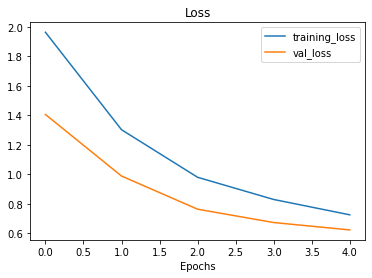

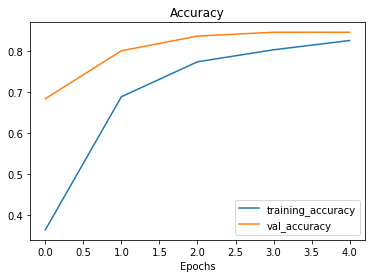

In [ ]:
plot_loss_curves(hist_model_2)

loading saved weights

In [ ]:
# This will replace any weights in model 2 with loaded weights
model_2.load_weights(cp_filepath)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 8s 94ms/step - loss: 0.6249 - accuracy: 0.8376


**Fine tuning** an existing model on 10% data:
Some earlier layers will be frozen and later laeyers will be unfrozen

**Reason why we unfroze end layers near the output not early layers:**

The early layers learn more general features (like roundness of pizza) which are learnt easily while the end layers learn more fine grained features

fine tuning usually works best after training a feature extraction model for a few epochs with large amounts of data. After few epochs unfroze 

NOTE: When fine-tuning we should lower learning_rate by some amount as we dont want to change already learnt weights too much. 

In [ ]:
# Lets nufroze last 10 layers
base_model.trainable = True

# Freeze all except last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for layer_num, layer in enumerate(model_2.layers[2].layers):
  print(layer_num, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 tf.math.truediv_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
# We are using the last model_2 with loaded weights
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# checkpoint callback

hist_model_2_finetuned = model_2.fit(train_data, epochs = 10,
                           validation_data = test_data,
                           validation_steps = (0.25*len(test_data)),
                           initial_epoch = hist_model_2.epoch[-1], # start training from last epoch of previ
                           #sly trained model_2
                           callbacks = [create_tensorboard_callback('transferLearning',
                                                                    'finetune_last10Layers')])



Saving TensorBoard log files to: transferLearning/finetune_last10Layers/20230206-192050
Epoch 5/10
24/24 [==============================] - 21s 565ms/step - loss: 0.7060 - accuracy: 0.7733 - val_loss: 0.4632 - val_accuracy: 0.8469
Epoch 6/10
24/24 [==============================] - 9s 365ms/step - loss: 0.3675 - accuracy: 0.8827 - val_loss: 0.4198 - val_accuracy: 0.8641
Epoch 7/10
24/24 [==============================] - 9s 364ms/step - loss: 0.2064 - accuracy: 0.9427 - val_loss: 0.3916 - val_accuracy: 0.8625
Epoch 8/10
24/24 [==============================] - 9s 359ms/step - loss: 0.1436 - accuracy: 0.9587 - val_loss: 0.4762 - val_accuracy: 0.8234
Epoch 9/10
24/24 [==============================] - 9s 362ms/step - loss: 0.1153 - accuracy: 0.9587 - val_loss: 0.4106 - val_accuracy: 0.8703
Epoch 10/10
24/24 [==============================] - 9s 342ms/step - loss: 0.0944 - accuracy: 0.9773 - val_loss: 0.4275 - val_accuracy: 0.8687


# MILESTONE PROJECT 1: FOOD 101 TM

In [ ]:
# check GPU


Mixed Precision training: It uses both 16-bit and 32 bit floating point types in a modeltraining to make it faster and use less memory.

Condition to leverage Mixed Precision training: 

1. GPU
2. The GPU should have a special hardware unit called tensor cores to accelerate float 16 matrix matrix multiplications and convoltions. 

recommeded GPUs: Nvidia v100, nvidia T4, Tesla T4 (colab prov


In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-583f1a15-106e-c866-f1fa-3c64ae7bd4b8)


In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13303400729923012393
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7657130617806683452
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

If we somehow dont have this GPU our code will still work just not fast enough

In [1]:
!wget https://raw.githubusercontent.com/Rajvardhan7/TensorFlow/main/Extras/helper_functions.py
import helper_functions
dir(helper_functions)

from helper_functions import create_tensorboard_callback, plot_loss_curves, pred_and_plot, unzip_data


--2023-02-08 17:15:44--  https://raw.githubusercontent.com/Rajvardhan7/TensorFlow/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-08 17:15:44 (85.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
tfds.list_builders()

In [4]:
(train_data, test_data), ds_info = tfds.load("food101", split = ["train", "validation"],
                                             shuffle_files = True,
                                             as_supervised=True,
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteNZVY9R/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteNZVY9R/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


Advantage of tfds:
1. It loads dataset in tensor format
2. Practice on well established datasets

In [5]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
class_names = ds_info.features['label'].names
class_names

In [9]:
train_one_sample = train_data.take(1)

(512, 512, 3)
fried_calamari


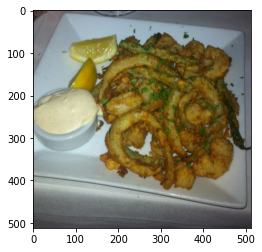

In [10]:
import matplotlib.pyplot as plt
for image, label in train_one_sample:
  print(image.shape)
  plt.imshow(image)
  print(class_names[label.numpy()])

Preprocessing function


What we know about our tfdf data:
1. It is 'uint8' datatype
2. It comprises of all different size tensors (diff size images)
3. Not scaled

What we know models like:
1. Not scaled
2. float32 and float16
3. batches 


In [10]:
def preprocess_img(image, label, img_shape = 224):

  image = tf.image.resize(image, [img_shape, img_shape])
  return tf.cast(image, dtype = tf.float32), label  #return tuple (flt23 img, label)

In [21]:
preprocessed_img = preprocess_img(image, label)

In [22]:
image

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[199, 100,  15],
        [192,  91,   9],
        [202,  95,  23],
        ...,
        [238, 196, 124],
        [237, 195, 123],
        [236, 194, 122]],

       [[210, 110,  25],
        [207, 105,  23],
        [194,  86,  13],
        ...,
        [238, 196, 124],
        [236, 194, 122],
        [235, 193, 121]],

       [[205, 103,  18],
        [213, 108,  25],
        [196,  86,  11],
        ...,
        [238, 195, 126],
        [237, 194, 125],
        [235, 192, 123]],

       ...,

       [[ 95,  28,  11],
        [ 94,  27,  10],
        [ 84,  17,   0],
        ...,
        [166,  32,   5],
        [166,  32,   3],
        [167,  34,   1]],

       [[ 87,  24,   7],
        [ 83,  18,   0],
        [ 87,  20,   1],
        ...,
        [155,  27,   0],
        [164,  39,   9],
        [156,  33,   0]],

       [[ 83,  21,   6],
        [ 79,  16,   0],
        [ 85,  19,   0],
        ...,
        [149,  25,   

In [23]:
preprocessed_img

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[196.98405   ,  96.515305  ,  13.443877  ],
         [185.15625   ,  75.776146  ,  10.615431  ],
         [176.09981   ,  62.711414  ,   9.320153  ],
         ...,
         [237.2455    , 192.6027    , 122.24549   ],
         [238.        , 196.        , 124.        ],
         [236.4598    , 194.4598    , 122.459785  ]],
 
        [[209.20886   , 106.47194   ,  23.047512  ],
         [168.58833   ,  56.285706  ,   0.8501243 ],
         [166.6894    ,  53.45121   ,   2.8341837 ],
         ...,
         [236.62468   , 192.2172    , 121.85998   ],
         [238.50987   , 195.96077   , 125.60809   ],
         [235.9958    , 193.4467    , 123.09402   ]],
 
        [[199.94514   ,  93.859375  ,  12.563774  ],
         [186.65593   ,  74.72003   ,   3.7927299 ],
         [164.02518   ,  50.23948   ,   0.        ],
         ...,
         [237.70091   , 193.48665   , 123.12944   ],
         [239.84373   , 196.84373   , 127.843735

## Making loading data faster using tf.data API

tf.data.AUTOTUNE: this will tell tensorflow to utilize all the processing units it can find to map the function on training examples

prefetch: While some processing is being done, till then next batch will be pre fetched and made ready for processing in parallel

cache: It can be used to store preprocessed images into RAM

In [50]:
import tensorflow_datasets as tfds

(train_data, test_data), ds_info = tfds.load("food101", split = ["train", "validation"],
                                             shuffle_files = True,
                                             as_supervised=True,
                                             with_info = True)

In [51]:
def preprocess_img(image, label, img_shape = 224):

  image = tf.image.resize(image, [img_shape, img_shape])
  return tf.cast(image, dtype = tf.float32), label  #return tuple (flt23 img, label)

In [52]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)

# Shuffle train data and turn into batches and prefetech it (load faster)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

It happened in a blink!

in a naive synchronous implementation like here, while your pipeline is fetching the data, your model is sitting idle. Conversely, while your model is training, the input pipeline is sitting idle. The training step time is thus the sum of opening, reading and training times.

Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.
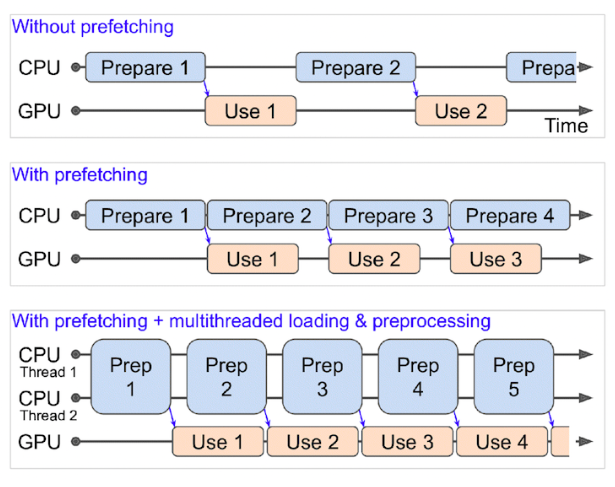

In [18]:
!wget https://raw.githubusercontent.com/Rajvardhan7/TensorFlow/main/Extras/helper_functions.py
import helper_functions
dir(helper_functions)

from helper_functions import create_tensorboard_callback, plot_loss_curves, pred_and_plot, unzip_data


--2023-02-08 19:26:26--  https://raw.githubusercontent.com/Rajvardhan7/TensorFlow/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-08 19:26:26 (93.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [19]:
create_tensorboard_callback

<function helper_functions.create_tensorboard_callback(dir_name, experiment_name)>

In [20]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = "modelcheckpoint/cp.ckpt",
                                                 monitor = 'val_loss',
                                                 save_best_only = True,
                                                 save_weights_only = True,
                                                 verbose = 0)


## Impementing Mixed Precision

read: tensorflow guide for mixed precision training

In [ ]:
!pip install tensorflow==2.4.1

In [33]:
import tensorflow as tf # older 2.9.2
tf.__version__

'2.9.2'

In [37]:
from tensorflow.keras import mixed_precision # change 1
mixed_precision.global_policy()

<Policy "mixed_float16">

In [38]:
from tensorflow.keras import mixed_precision # change 1
mixed_precision.set_global_policy("float32") # change 2

In [39]:
mixed_precision.global_policy()

<Policy "float32">

NOTE: 

**In mixed precison computations are done in float16 for performance but variables must be kept in float32 for numeric stability. Thus in output layer we have to do dtype =tf.float32** 

B

In [53]:
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Activation

from tensorflow.keras.layers.experimental import preprocessing

class_names = ds_info.features['label'].names
input_shape = (224, 224, 3)

# Creating feature extraction layer
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Creating functional model
inputs = Input(shape = input_shape, name = 'input')
# x = preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs, training = False)
x = GlobalAveragePooling2D()(x)
x = Dense(len(class_names))(x) # we will add activation layer separately
outputs = Activation("softmax", dtype = tf.float32, name = 'op')(x) # change 3

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 op (Activation)             (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
___________________________________________

In [14]:
# checking if processing will be done leveraging mixed precision or not
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
op True float32 <Policy "float32">


layer.dtype: the data in which layer will store its variables

layer.dtype_policy: the data type a layer computes on its variables

In [ ]:
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [54]:
hist_101_model = model.fit(train_data, epochs = 3,
                           steps_per_epoch = len(train_data),
                           validation_data = test_data,
                           validation_steps = int(0.15*len(test_data)),
                           callbacks = [create_tensorboard_callback("training_logs", "effB0_101_M1"),
                                        cp_callback])

Saving TensorBoard log files to: training_logs/effB0_101_M1/20230208-195040
Epoch 1/3
2368/2368 [==============================] - 222s 90ms/step - loss: 1.7171 - accuracy: 0.5827 - val_loss: 1.1348 - val_accuracy: 0.6970
Epoch 2/3
2368/2368 [==============================] - 214s 89ms/step - loss: 1.1998 - accuracy: 0.6883 - val_loss: 1.0264 - val_accuracy: 0.7217
Epoch 3/3
2368/2368 [==============================] - 215s 90ms/step - loss: 1.0540 - accuracy: 0.7232 - val_loss: 0.9910 - val_accuracy: 0.7291


Because of parallel computing and superposing preprocessing and training together using tf.data API it is taking only 2 minutes to complete 1 epoch. Otherwise it was taking 1.2 hrs!!

In [42]:
0.25*len(test_data)

6312.5

In [55]:
!tensorboard dev -list

usage: tensorboard
       [-h]
       [--helpfull]
       {serve,dev}
       ...
tensorboard: error: unrecognized arguments: -list
